## LCC calculation tests (for a single rail)

Notebook to test the LCC calculations for a single rail.

Version 0.1 (2025-05-06): initial conversion from Matlab.

## Setting parameters

In [1]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:
# Define the rail profile
rail_profile = "MB5"  # MB5 or MB6

# Define the axle load (in tonnes)
load = 30

# The actual path to your Excel file
file_path = '../data/raw/raw_data_structured_with_load.csv'

## Reading input data

In [3]:
# Ensure the preprocessings module is accessible
import sys
sys.path.append('../')  # Adjust the path to the root directory containing 'preprocessings'

# Import the function to read the input data
from preprocessings.read_input_data import read_input_data

# Call the function to read the data
data_df = read_input_data(file_path)

In [4]:
from rail_analysis.rail_measures import get_h_index, get_wear_data, get_rcf_residual, get_rcf_depth

h_index = get_h_index(data_df, rail_profile, load=load)
wear = get_wear_data(data_df, rail_profile, load=load)
rcf_residual = get_rcf_residual(data_df, rail_profile, load=load)
rcf_depth = get_rcf_depth(data_df, rail_profile, load=load)

## LCC calculation

In [5]:
from rail_analysis.LCC import get_annuity

# Example usage of the get_lcc function
grinding_freq = 5  # months
tamping_freq = 47  # months
maint_strategy = (grinding_freq, tamping_freq)
annuity, rail_lifetime = get_annuity(h_index, wear, maint_strategy, rcf_residual, rcf_depth)
print(f"Total LCC: {annuity:.2f} SEK/m/year")

Total LCC: 1271.31 SEK/m/year


## Plots

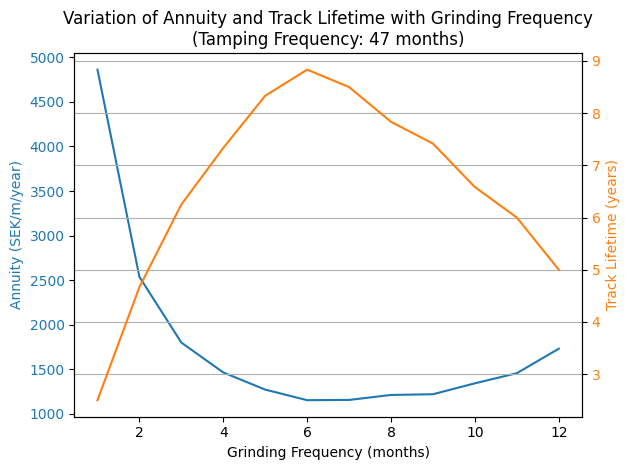

Minimum annuity of 1152.54 SEK/m/year is reached at a grinding frequency of 6 months, with a track lifetime of 8.83 years.


In [6]:
from rail_analysis.LCC import plot_annuity_and_lifetime_with_tamping

# Example usage
plot_annuity_and_lifetime_with_tamping(tamping_frequency=47, data_df=data_df)

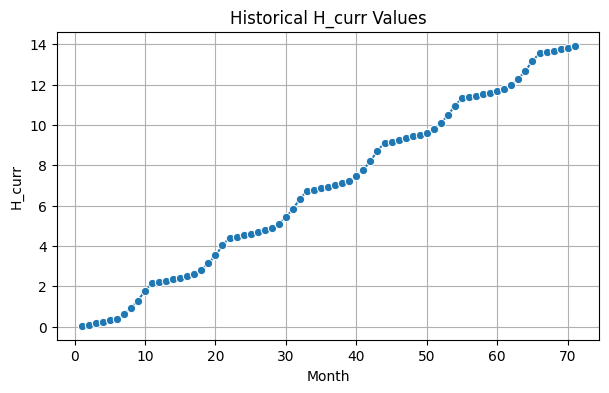

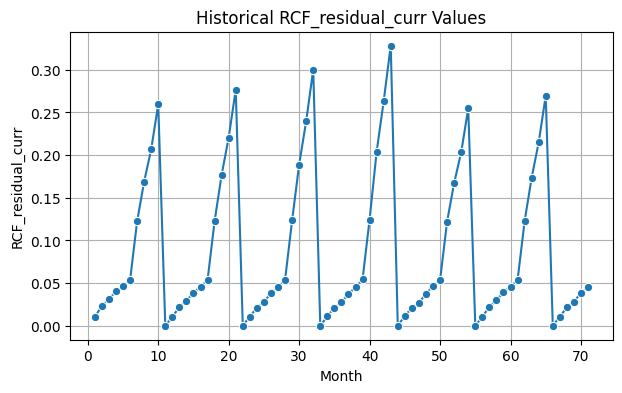

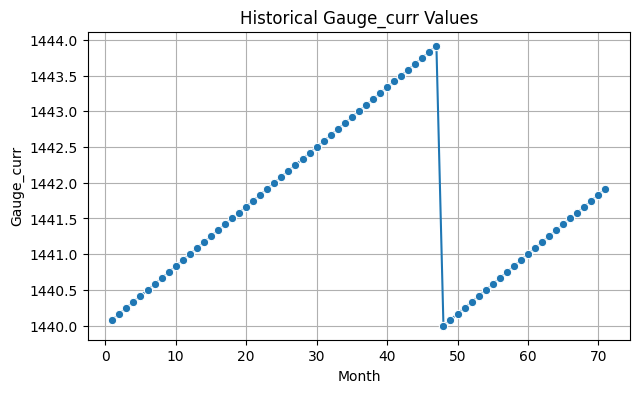

Track lifetime in months: 71
Track lifetime in years: 5.92


In [8]:
grinding_freq = 11  # months
tamping_freq = 48  # months
maint_strategy = (grinding_freq, tamping_freq)

# Extract historical data from the simulation
historical_data = get_annuity(h_index, wear, maint_strategy, rcf_residual, rcf_depth, gauge_widening_per_year=1, track_results=True)[2]

# plot the historical data
from rail_analysis.LCC import plot_historical_data
plot_historical_data(historical_data)